In [1]:
import pandas as pd
import numpy as np
import armageddon.solver as solver
import matplotlib.pyplot as plt
import math

## Plot the obsrvation

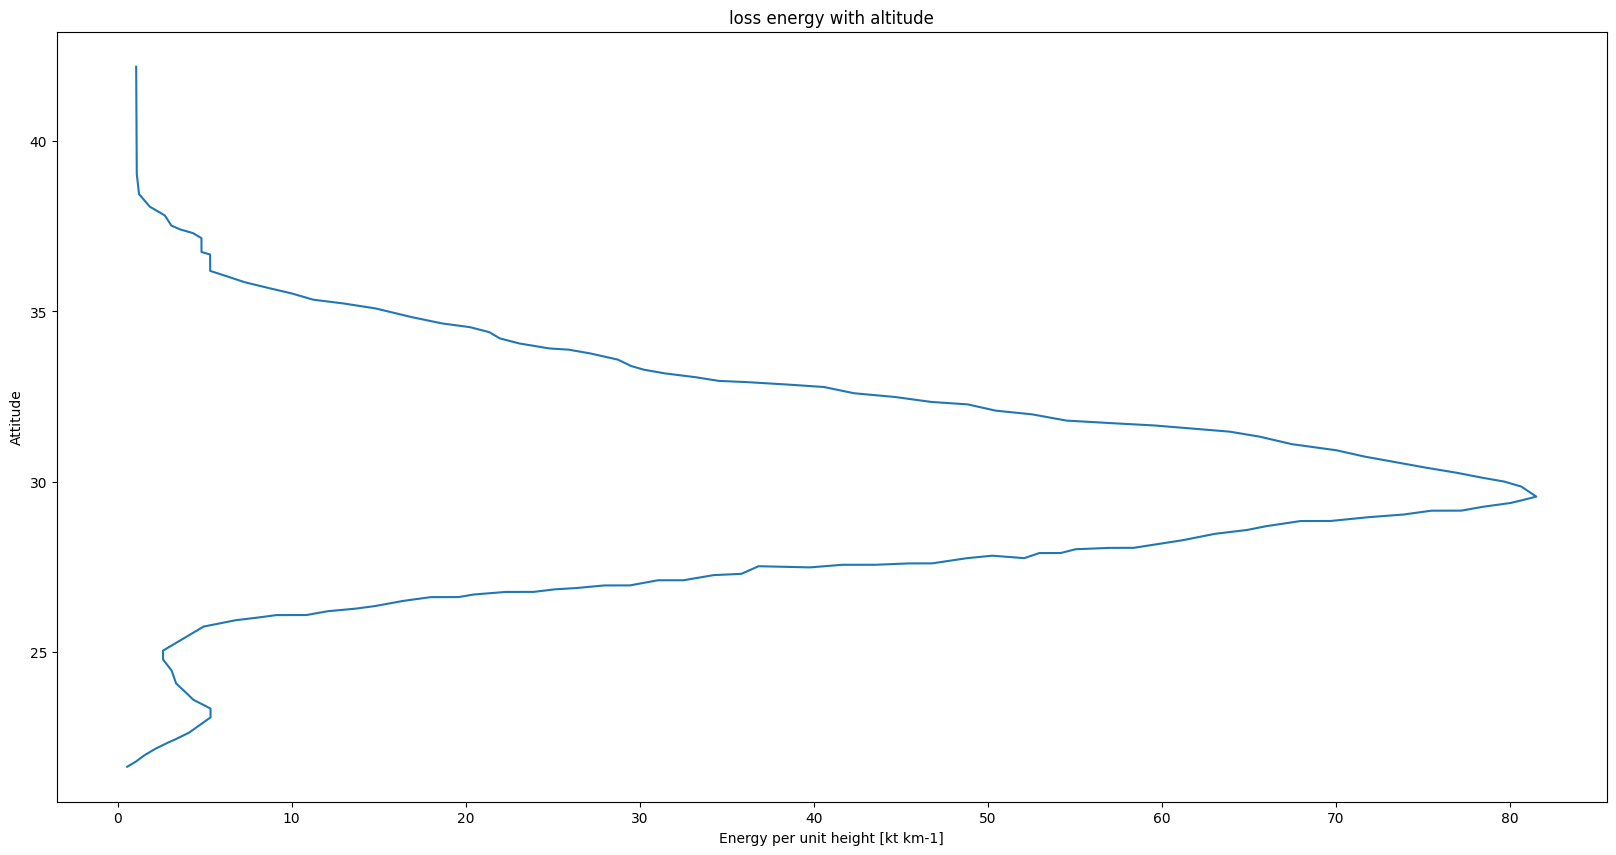

In [2]:
observe_data = pd.read_csv('resources/ChelyabinskEnergyAltitude.csv')
atmos_density = pd.read_csv('resources/AltitudeDensityTable.csv')[1:]
height = observe_data['Height (km)']
loss_energy2 = observe_data['Energy Per Unit Length (kt Km^-1)']
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(loss_energy2,height)
ax.set_xlabel('Energy per unit height [kt km-1]')
ax.set_ylabel('Attitude')
ax.set_title('loss energy with altitude')
plt.show()


## Calculate radius and strength

First, set an assumption that the initial point is the break up point.

Then, get the point with max dedz in observation to be the burst up point.

$$\rho_1 v_1^2 = Y$$

$$\rho_2 v_2^2 = Y$$

As the first point is the break up point, the break up velocity is $v_1$ = 19200 m/s.

In [3]:
break_height = height[0]
burst_loc = np.argmax(loss_energy2)
burst_height = height[burst_loc]
# Then we can check the table
rho_break = 1.2 * np.exp(-break_height*1000/8000)
rho_burst = 1.2 * np.exp(-burst_height*1000/8000)

# rho_burst = atmos_density._get_value(16, 'Atmospheric')
# rho_burst
v2_rate = rho_break/rho_burst
v_burst = np.sqrt(5 * 19.2 ** 2)


At the same time, we can get $\rho_1$ and $\rho_1$ through exponential method.

$$\rho_1 = 0.006147538979379376$$

$$\rho_2 = 0.029825145182253092$$



In [4]:
velocity = 19200 
strength = rho_break * velocity ** 2
v_burst = np.sqrt(strength / rho_burst)

In [5]:
strength

2266228.7693584133

In [6]:
v_burst

8716.870440229282

So, we can get that

$$Y = 2266228.7693584133$$

$$v_2 = 8716.870440229282$$

Then, the total integration of loss energy can be calculated according to the given table.

$$ E = \int d_e/d_z * d_z $$

At the same time, 

$$ E = 0.5mv_2^2 - 0.5mv_1^2$$

Because the velocity changing rate is mush larger than the mass changing rate. The mass is assumed to be a constant in the calculation. Then, the mass can be gotten according to the equation.

In [7]:
import math
E_loss = np.diff(height) * np.array(loss_energy2[1:])
E_total = np.sum(E_loss[0:burst_loc+1])
del_E =-E_total * (4.184e12)
mass = del_E/((0.5 * velocity **2) - (0.5 * v_burst **2))
density = 3300
radius = math.pow((mass * 0.75)/(density * np.pi), 1/3)

In [8]:
radius

8.561240277523675

As aboving calculation, 

$$m = \rho V$$

$$V = (4/3) \pi R^3$$

Therefore, the radius can be achieved

$$ R = 8.561240277523675$$

In [9]:
init_altitude=height[0] * 1000
para = pd.DataFrame([[radius,18.3,init_altitude,strength,3300,velocity]],
                    columns=['radius', 'angle', 'init_altitude',
                            'strngth', 'density', 'velocity'], )

In [10]:
para

,radius,angle,init_altitude,strngth,density,velocity
0,8.56124,18.3,42192.2,2.266229e+06,3300,19200


## Apply the solver function

In [11]:
planet = solver.Planet(atmos_func='exponential')
result = planet.solve_atmospheric_entry(radius=radius, angle=18.3,init_altitude=height[0] * 1000,
                                       strength=strength, density=3300,
                                       velocity=velocity)
energy = planet.calculate_energy(result)

## Plot and compare the observation and estimation

(20.0, 42.0)

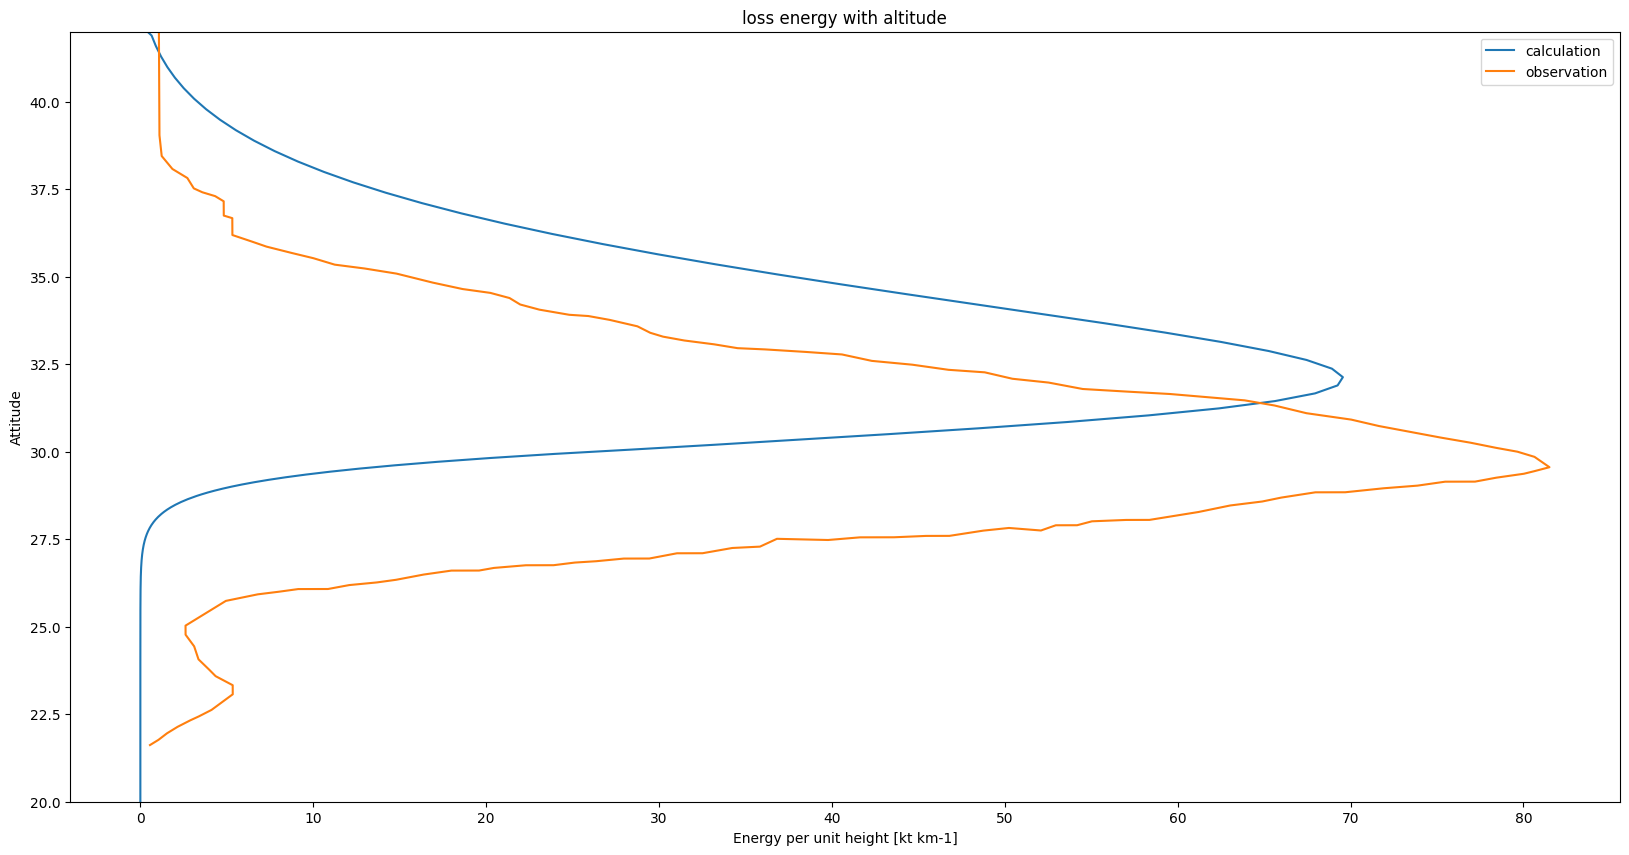

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
loss_energy = energy['dedz']
x = energy['altitude']/1000
ax.plot(loss_energy,x, label = "calculation")
ax.plot(loss_energy2,height, label = "observation")
ax.set_xlabel('Energy per unit height [kt km-1]')
ax.set_ylabel('Attitude')
ax.set_title('loss energy with altitude')
ax.legend()
ax.set_ylim(20, 42)

## Adjust the curve based simple machine learning

apply distance between the observed burst point and the predicted burst point to build a loss function. As the fourteen following figures, the predicted curve just comes closer to the observation.

It needs to be mentioned that the loss function should be designed more dedicated when facing difficult problem.

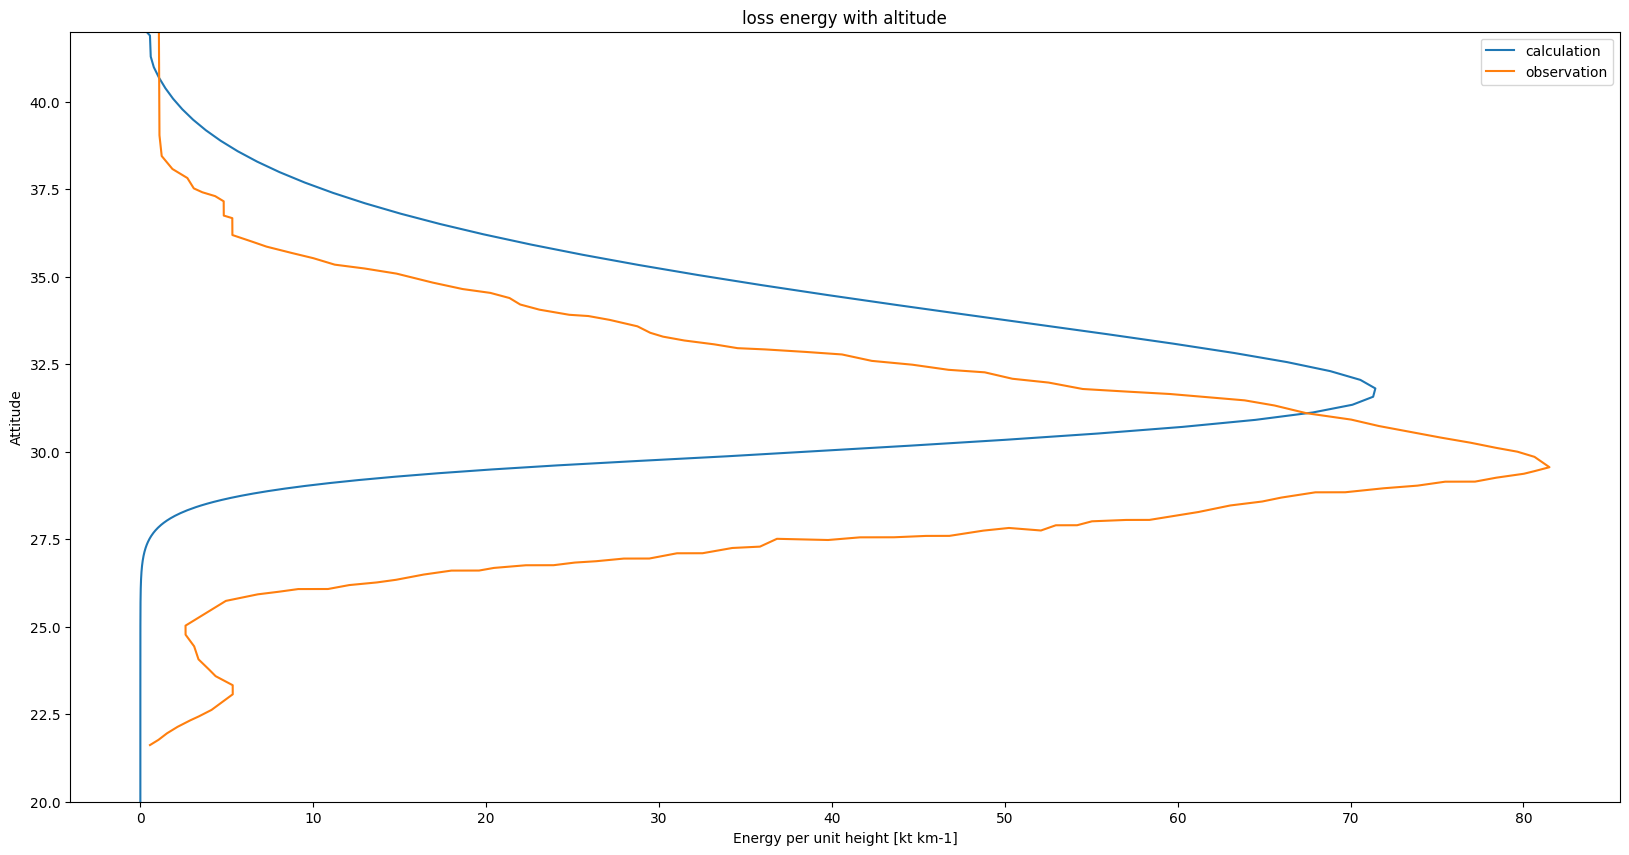

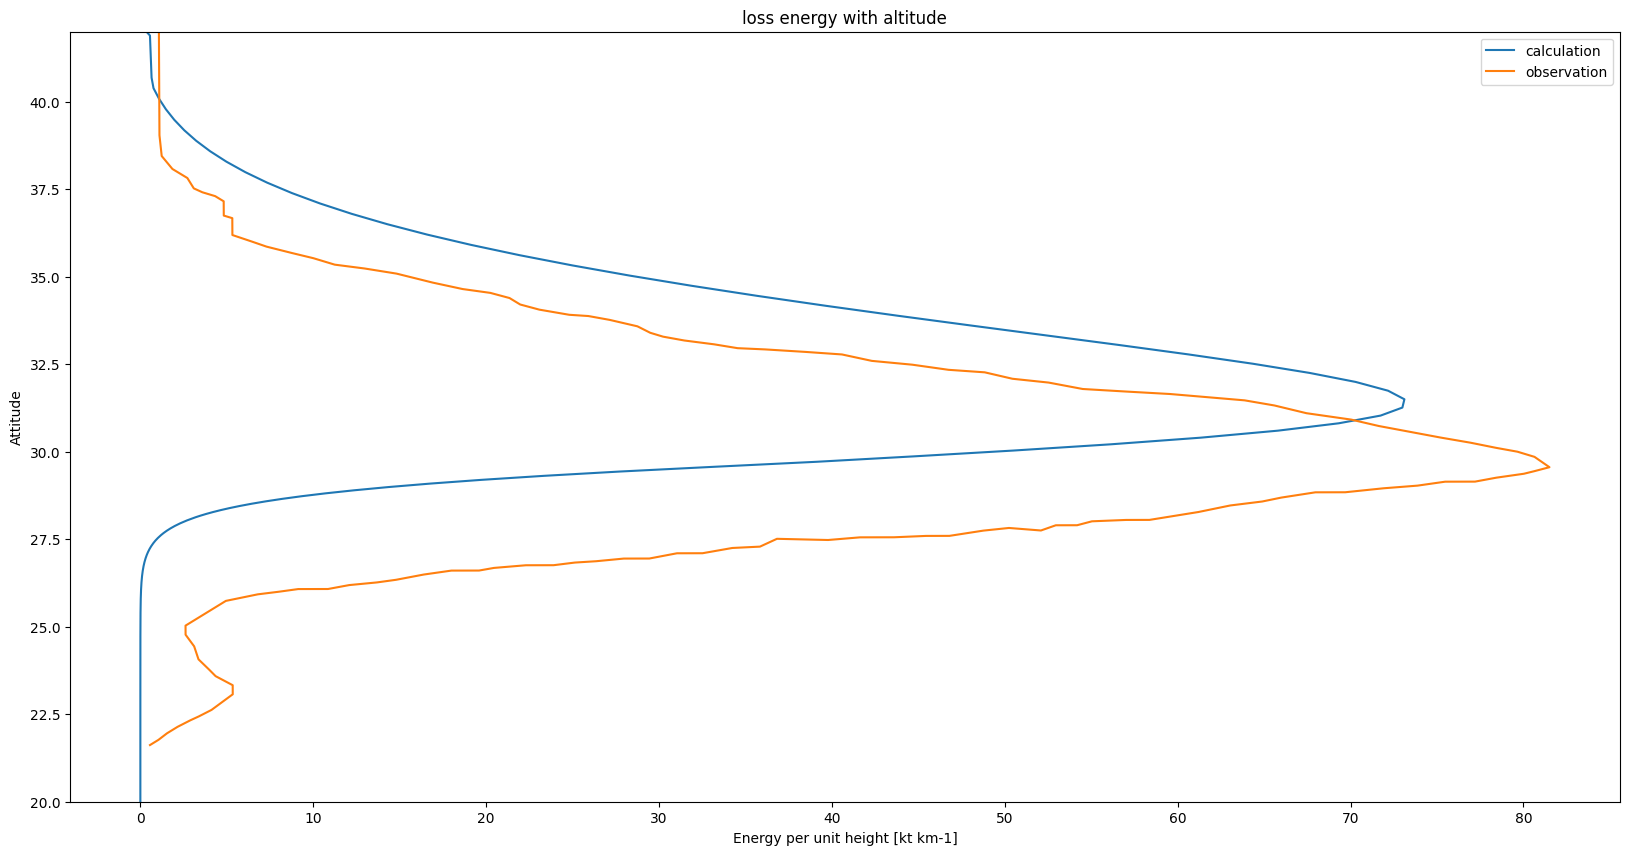

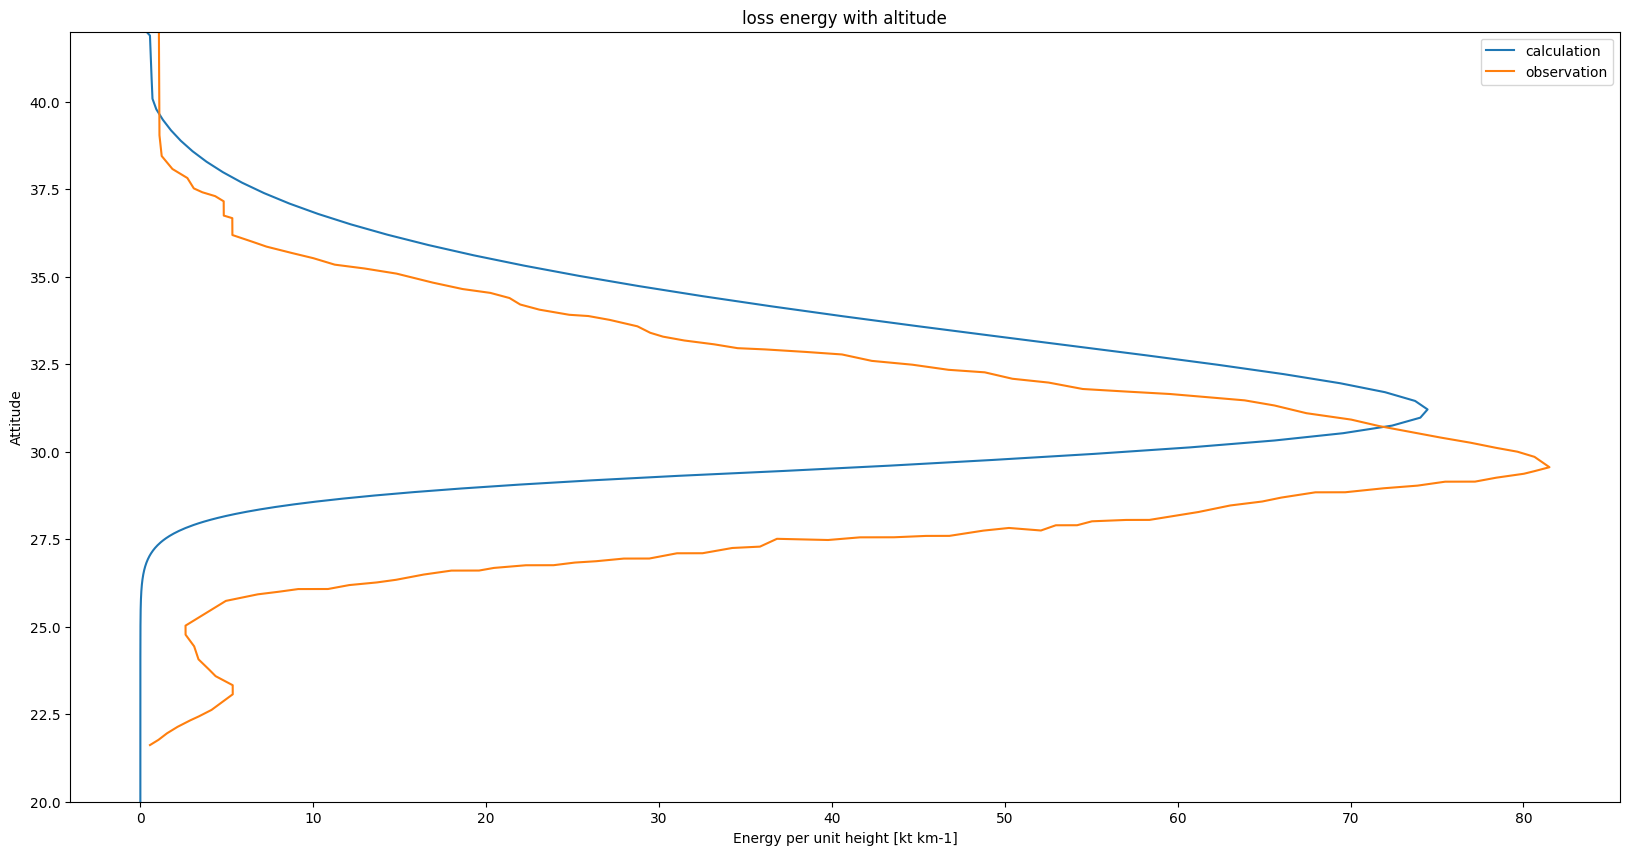

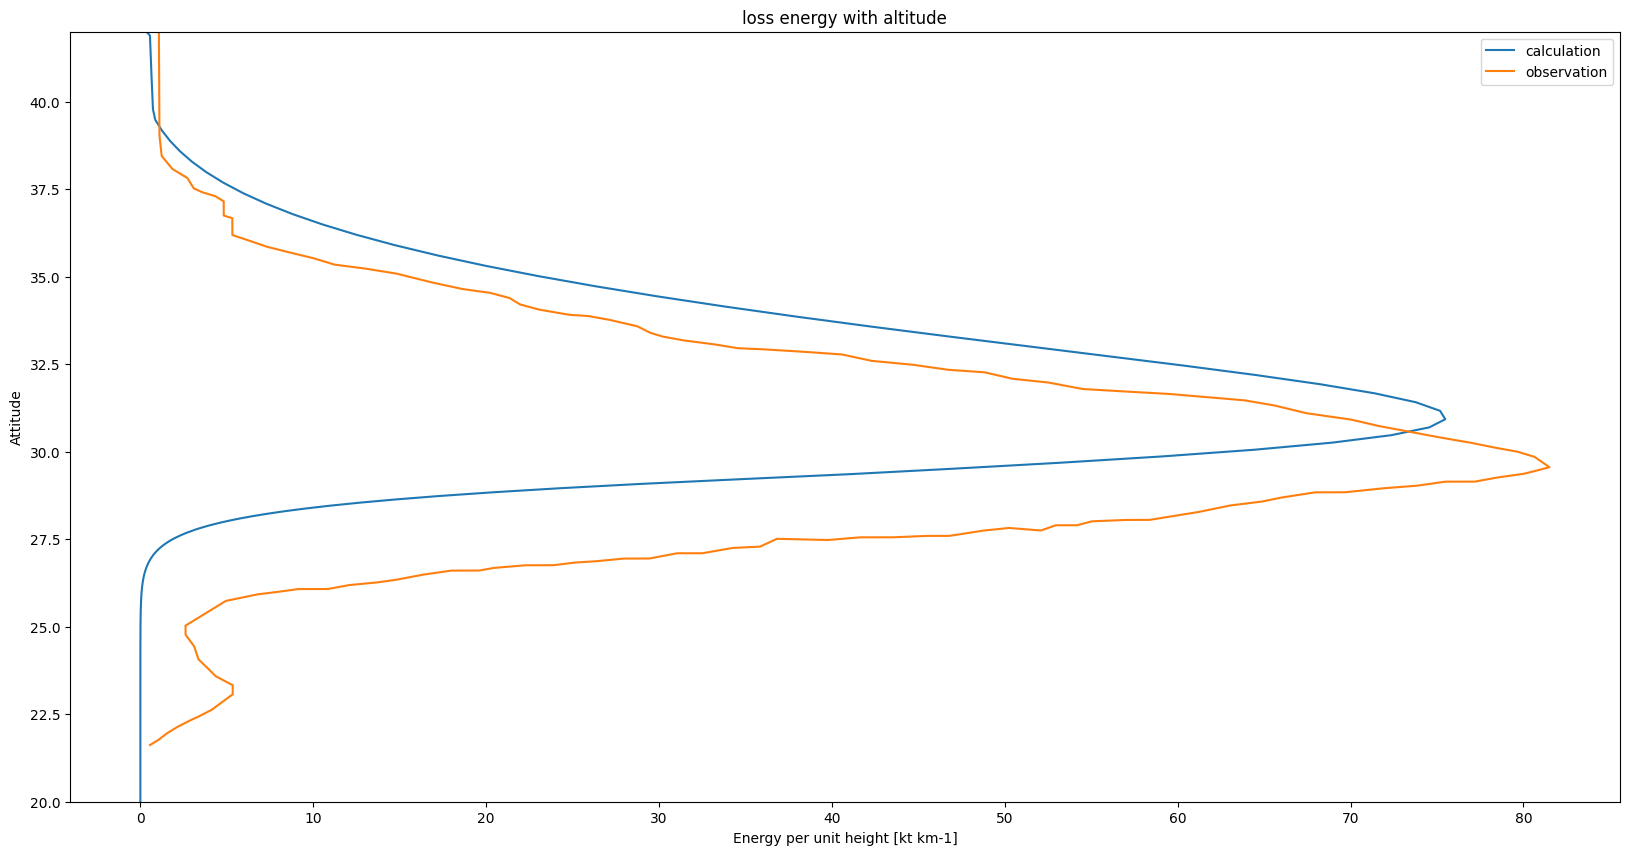

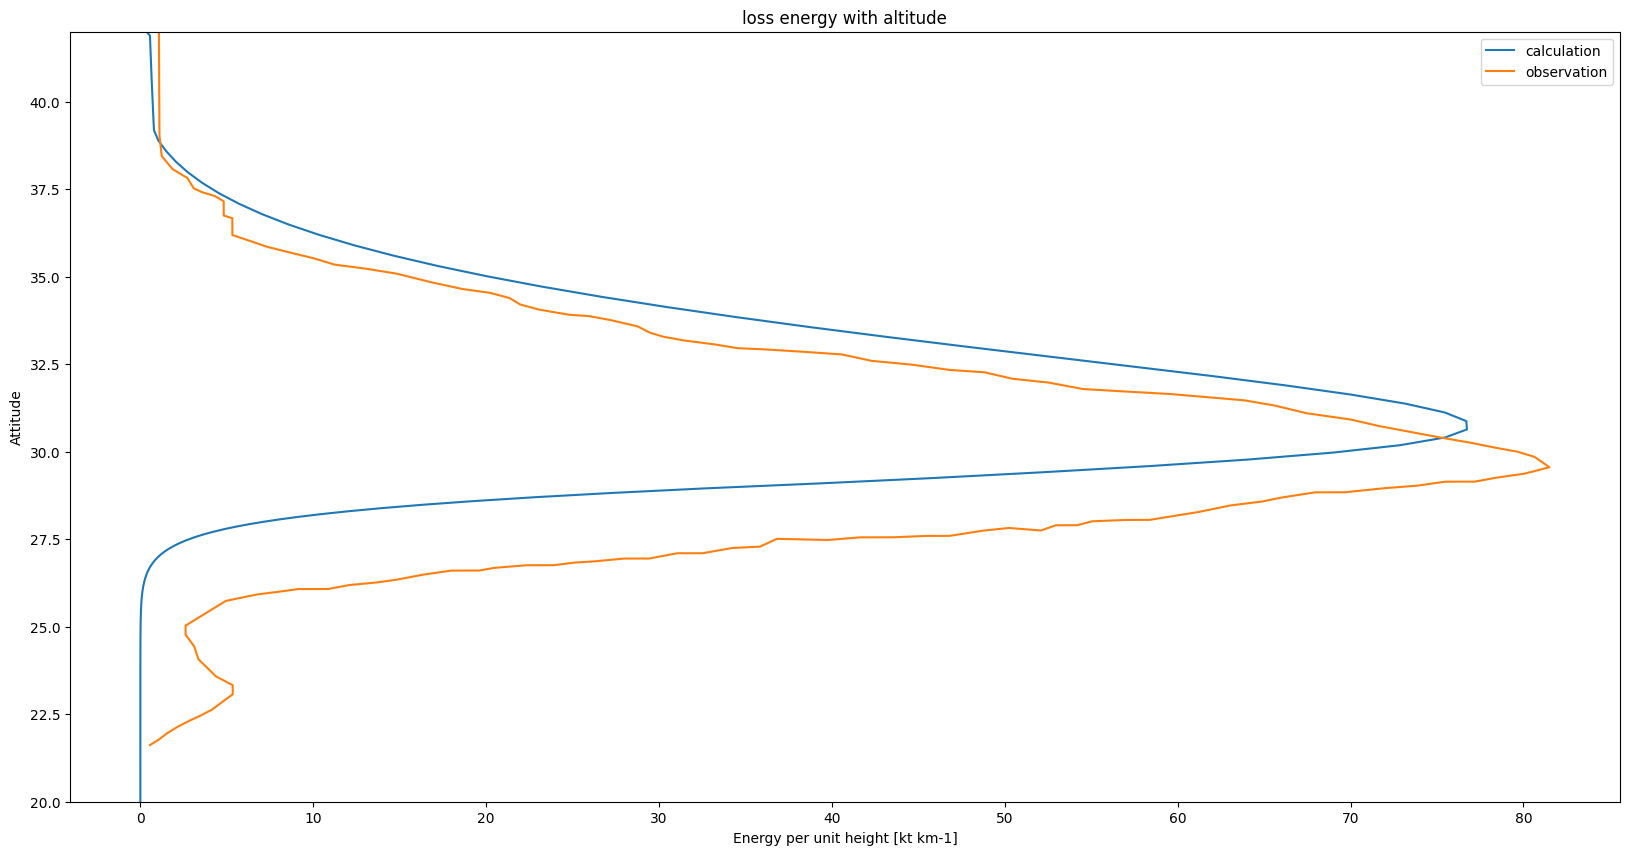

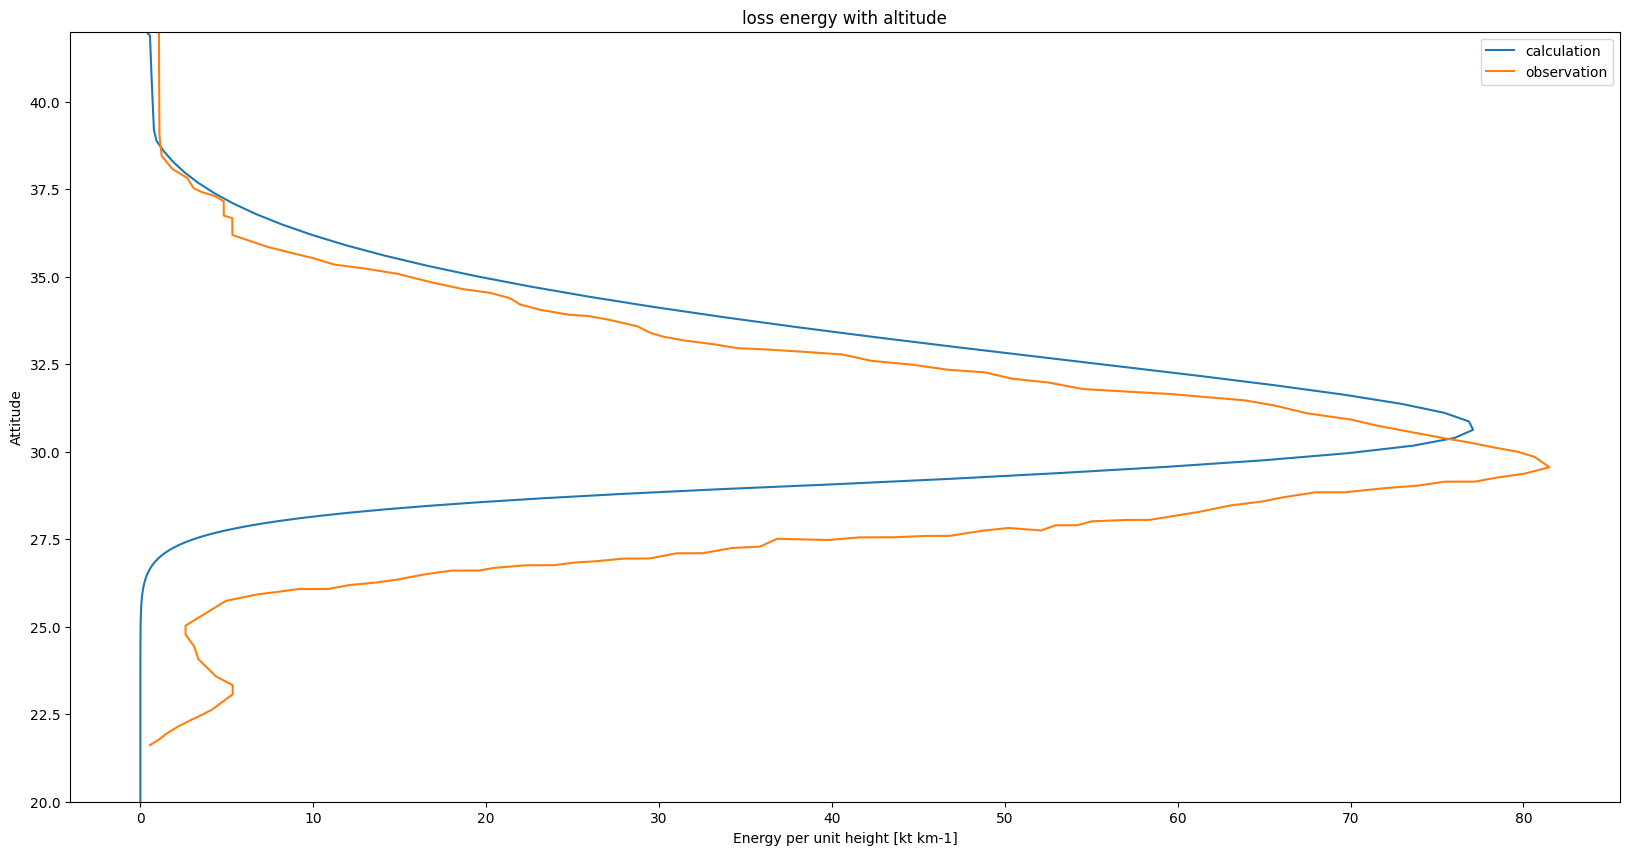

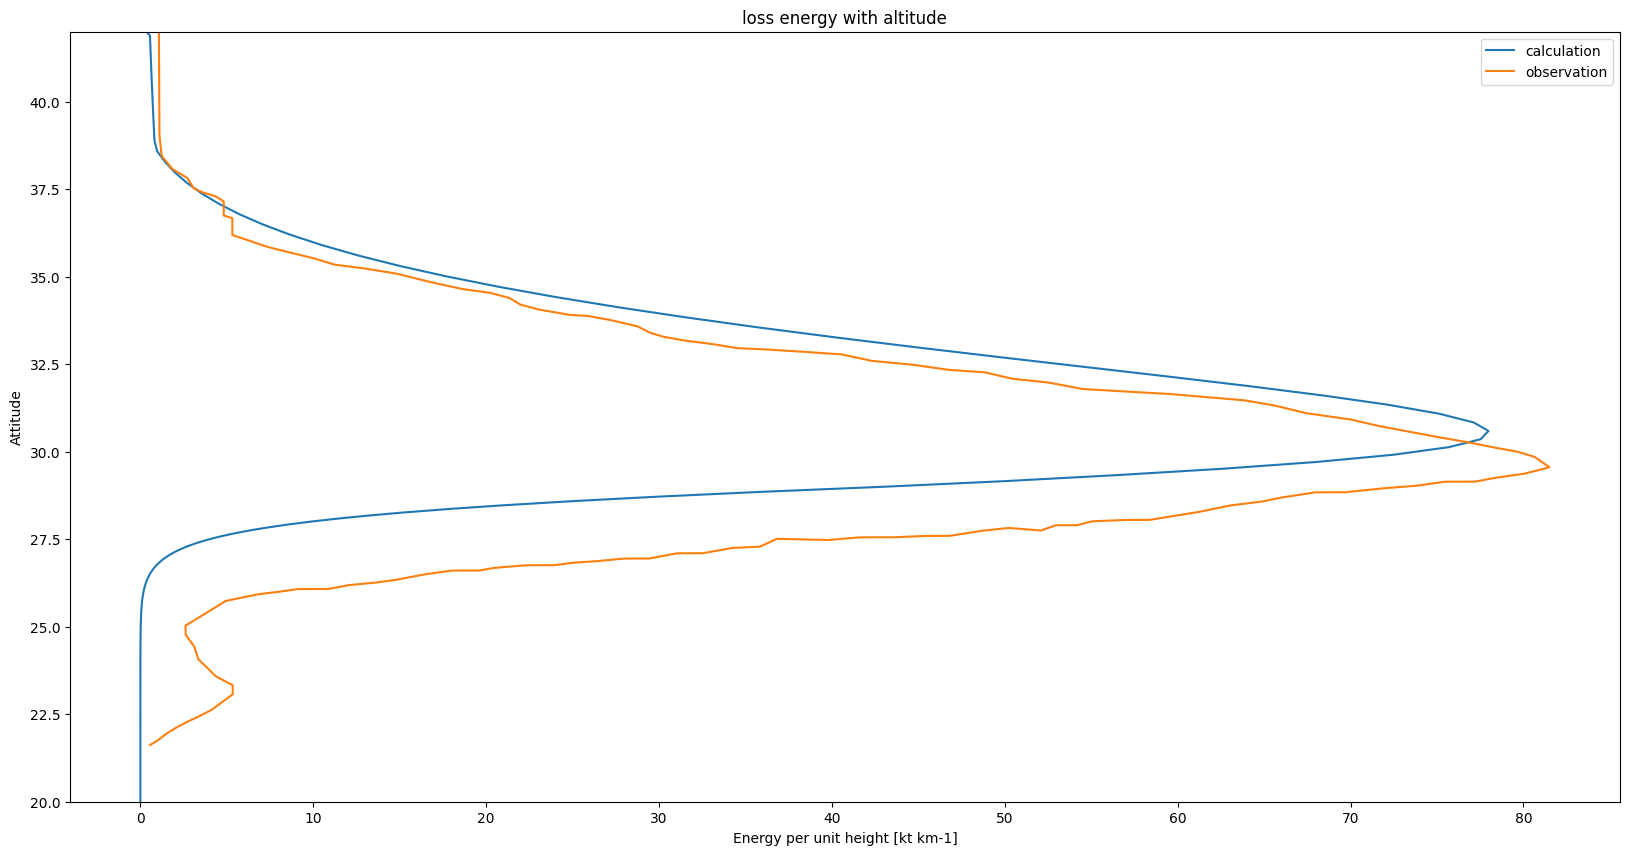

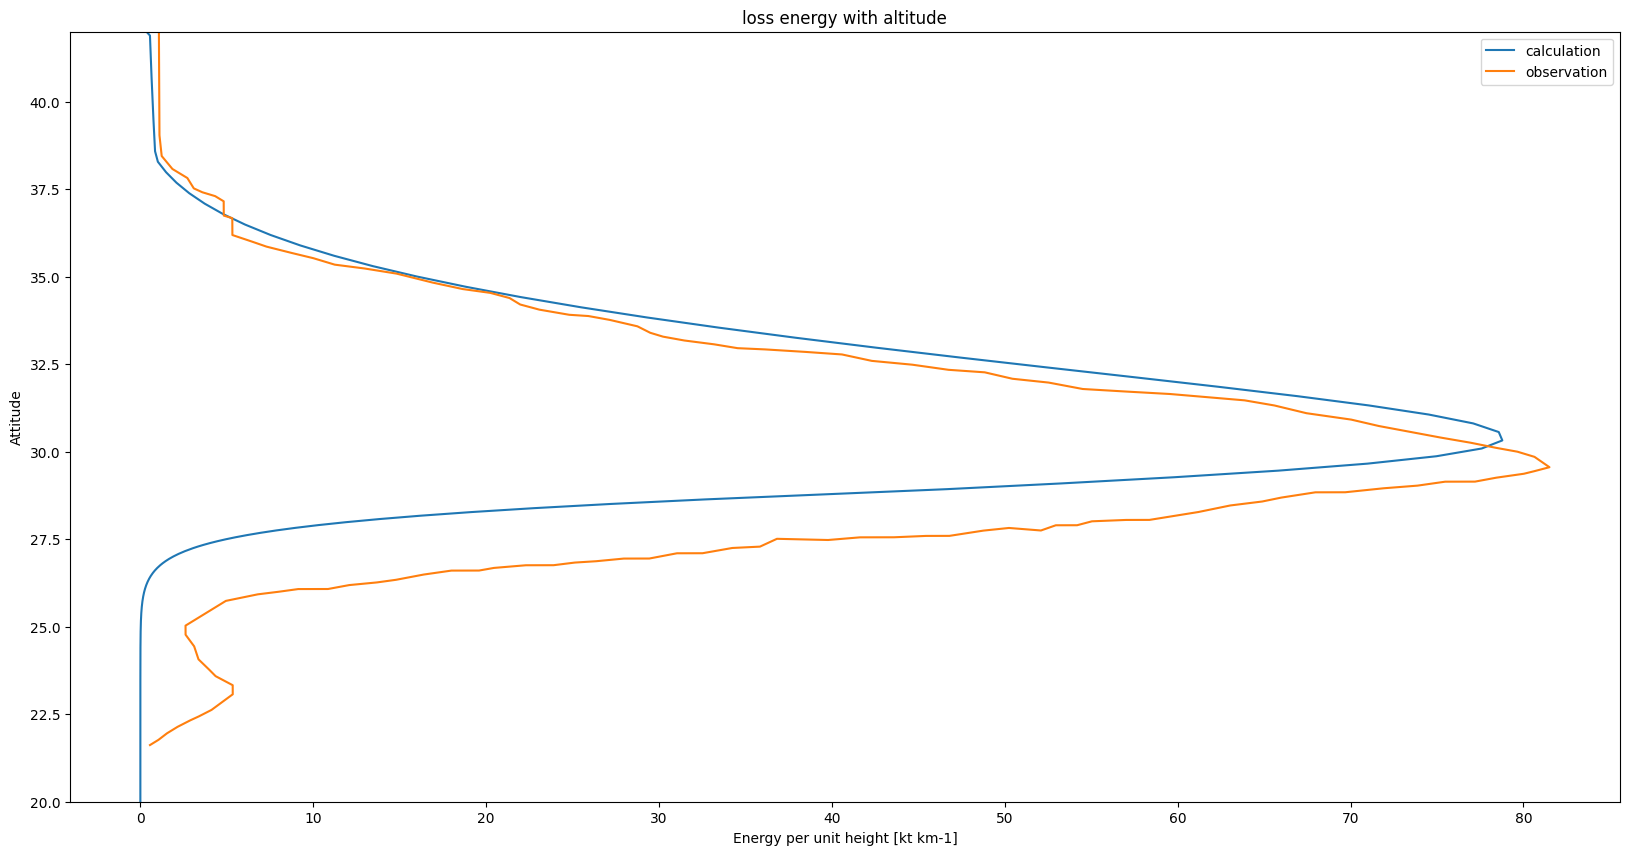

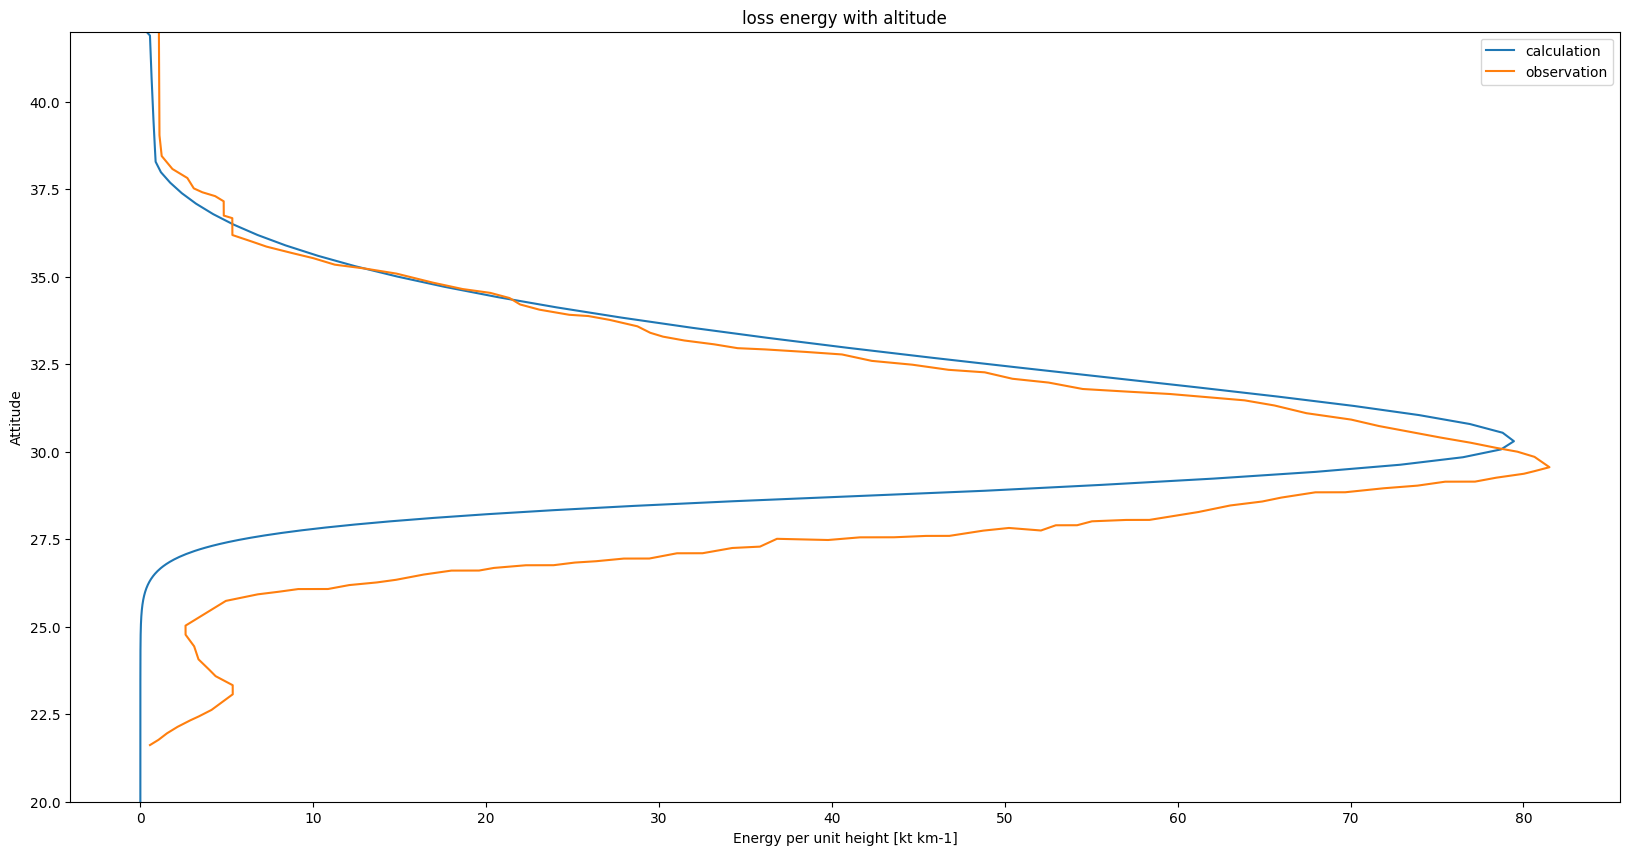

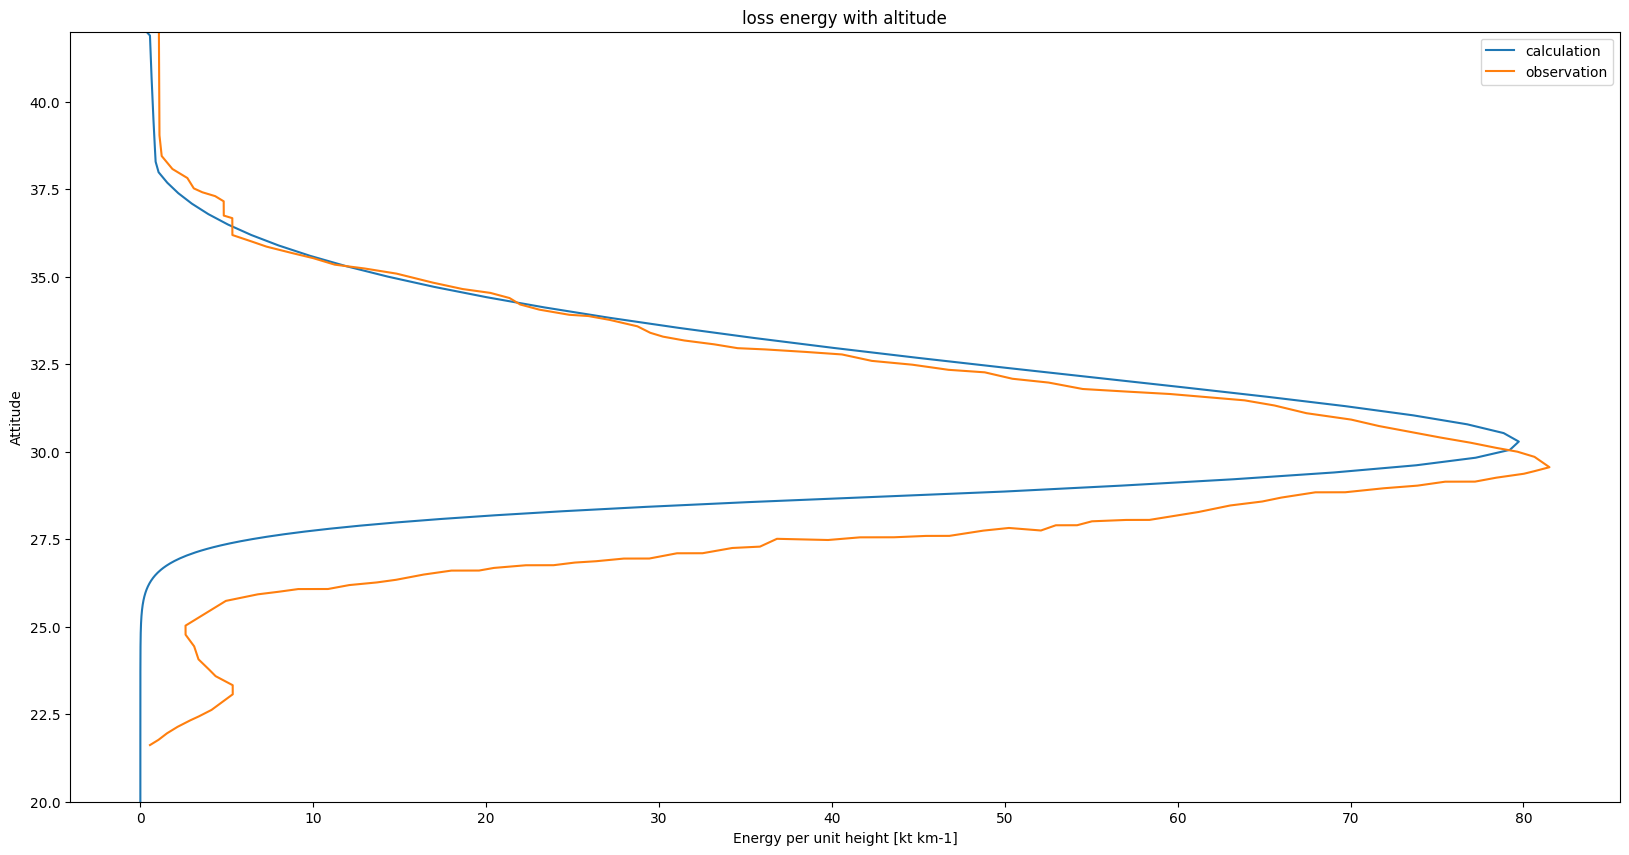

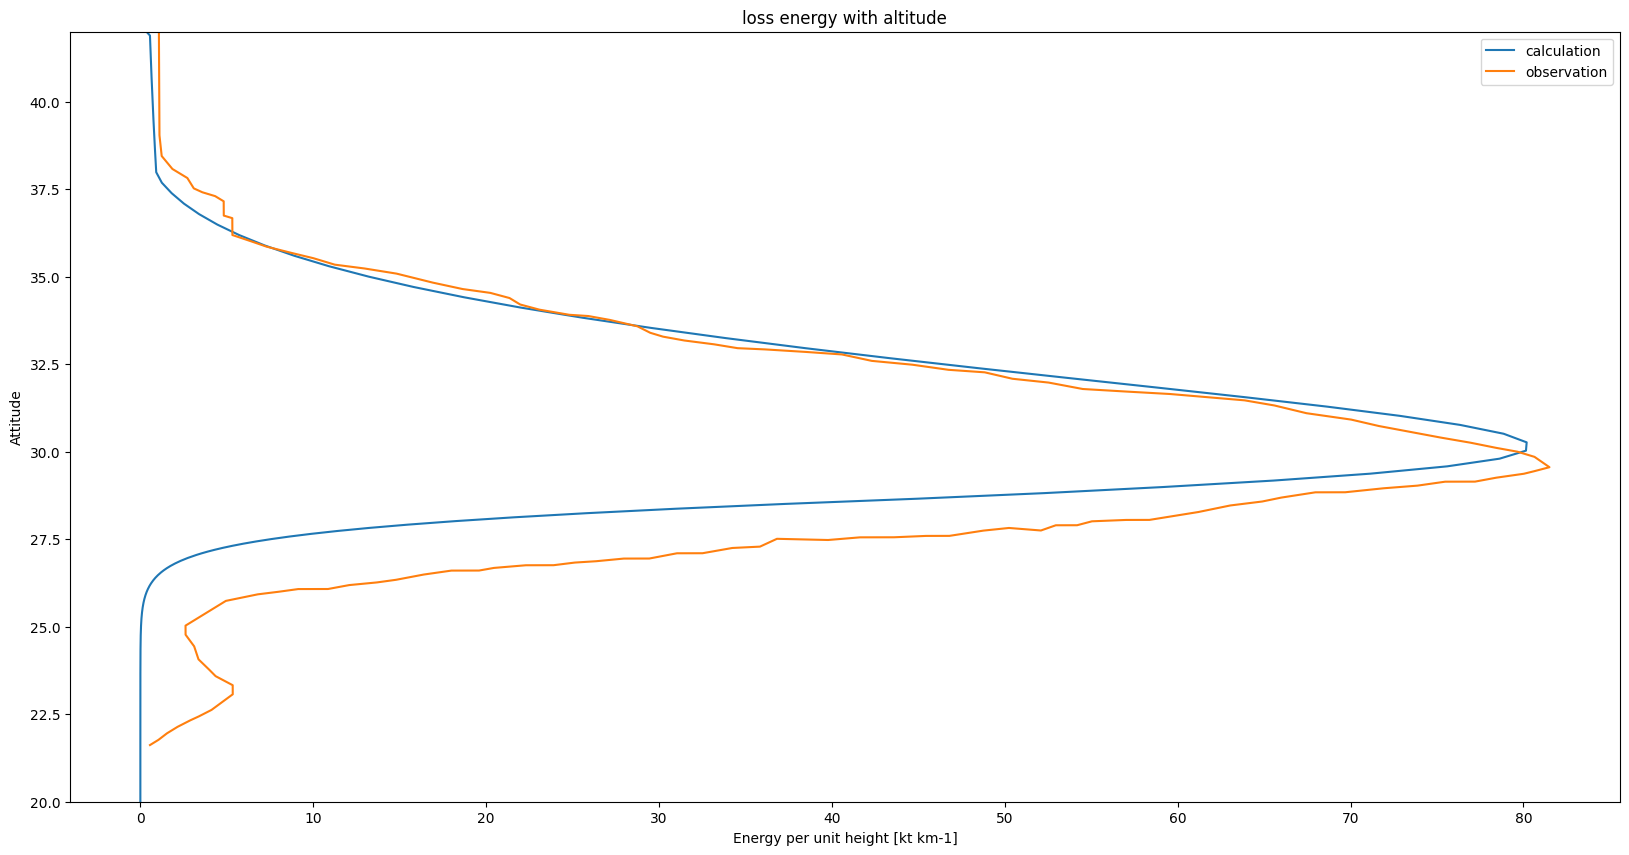

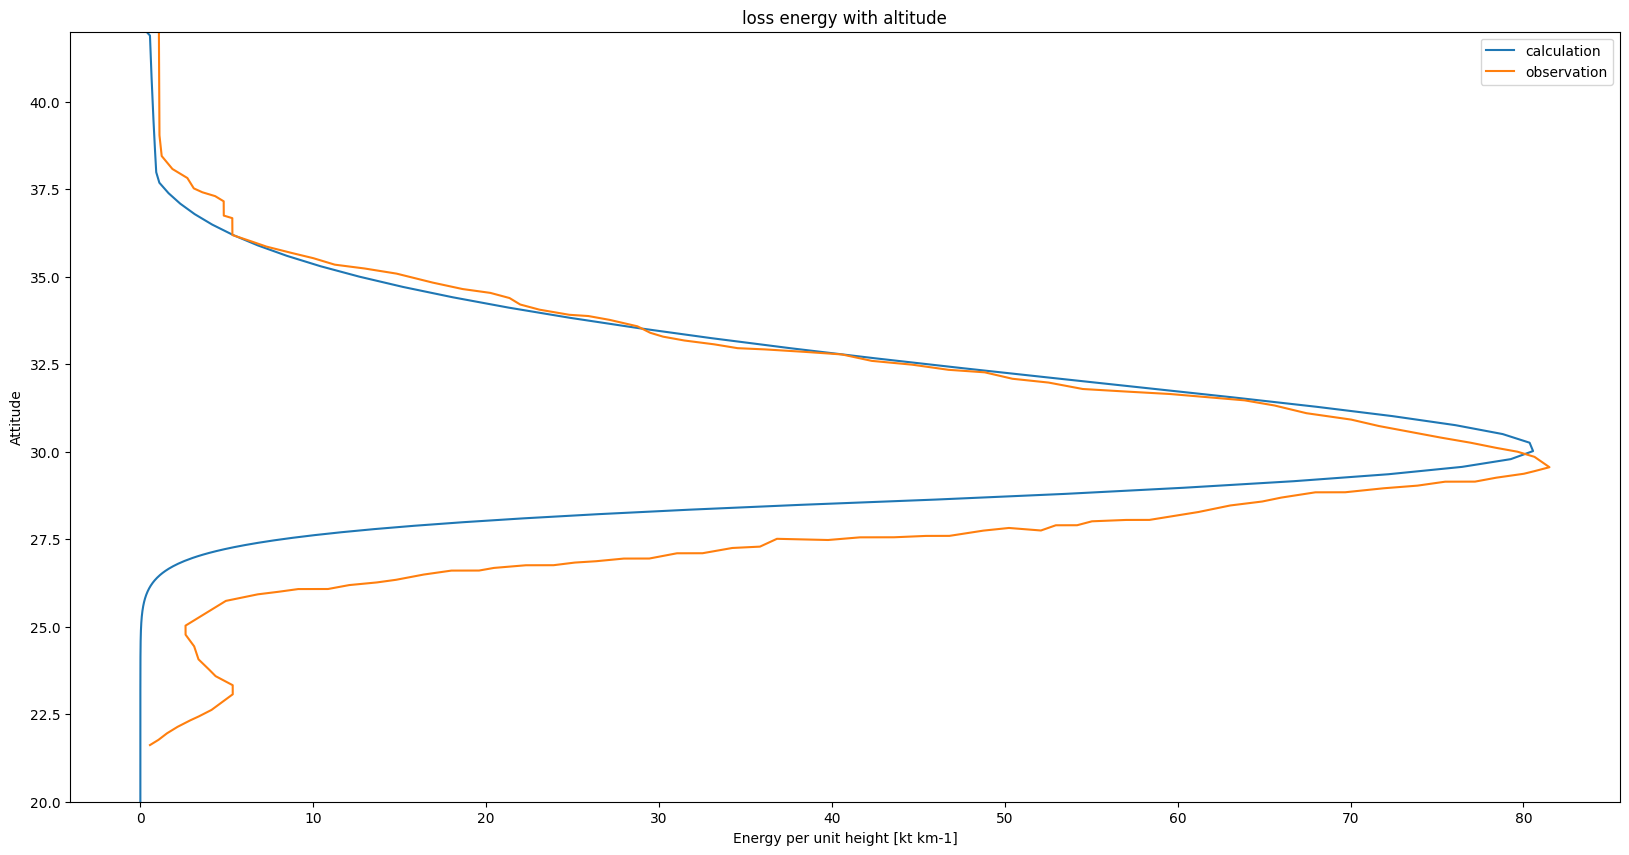

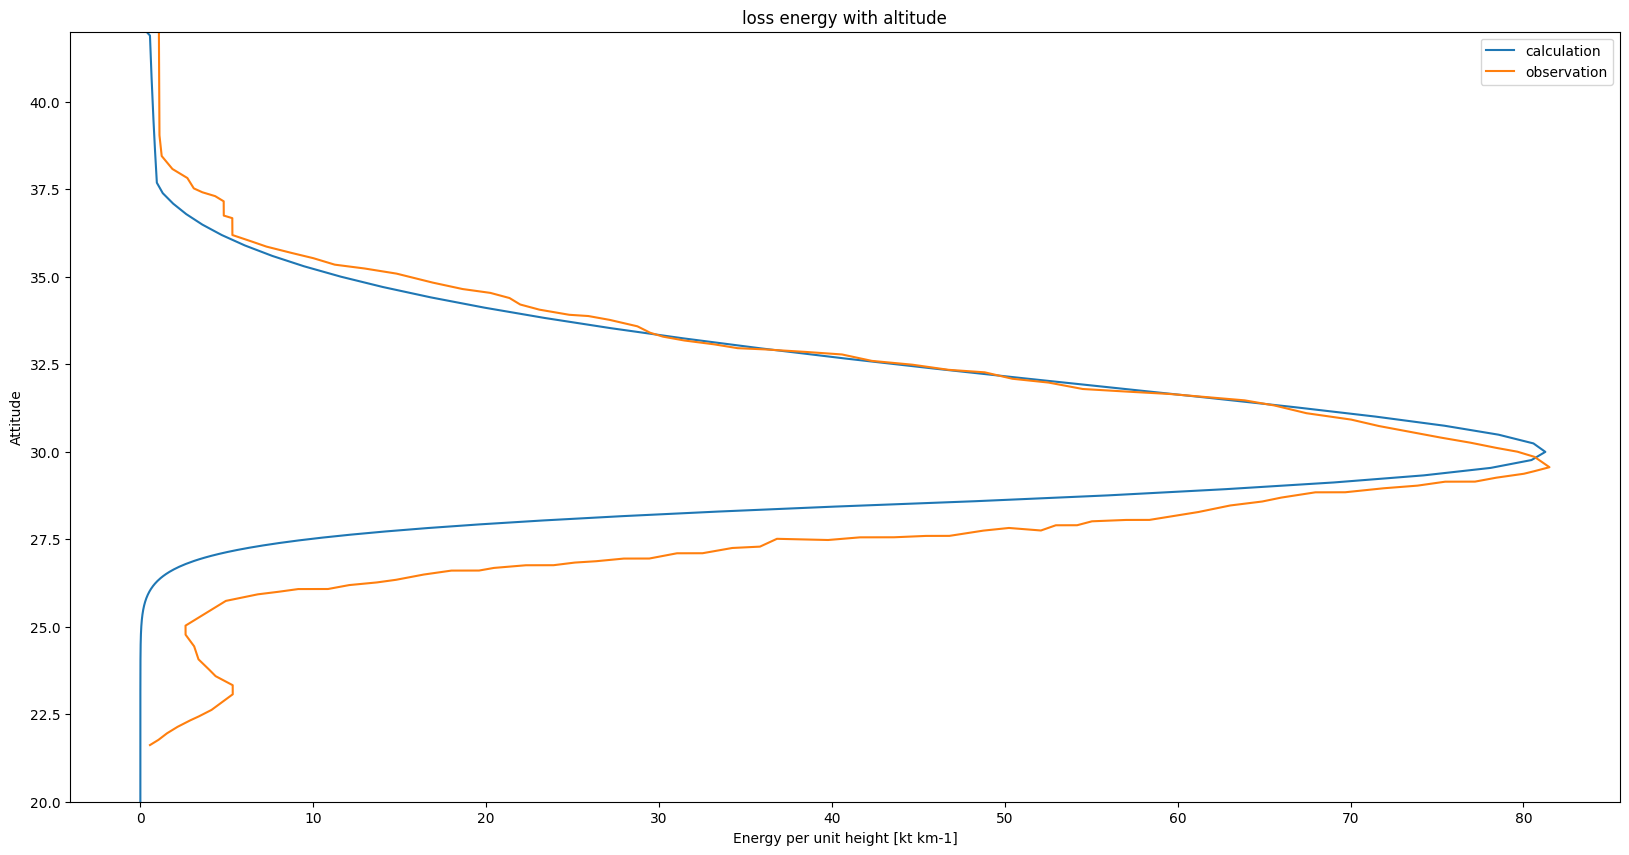

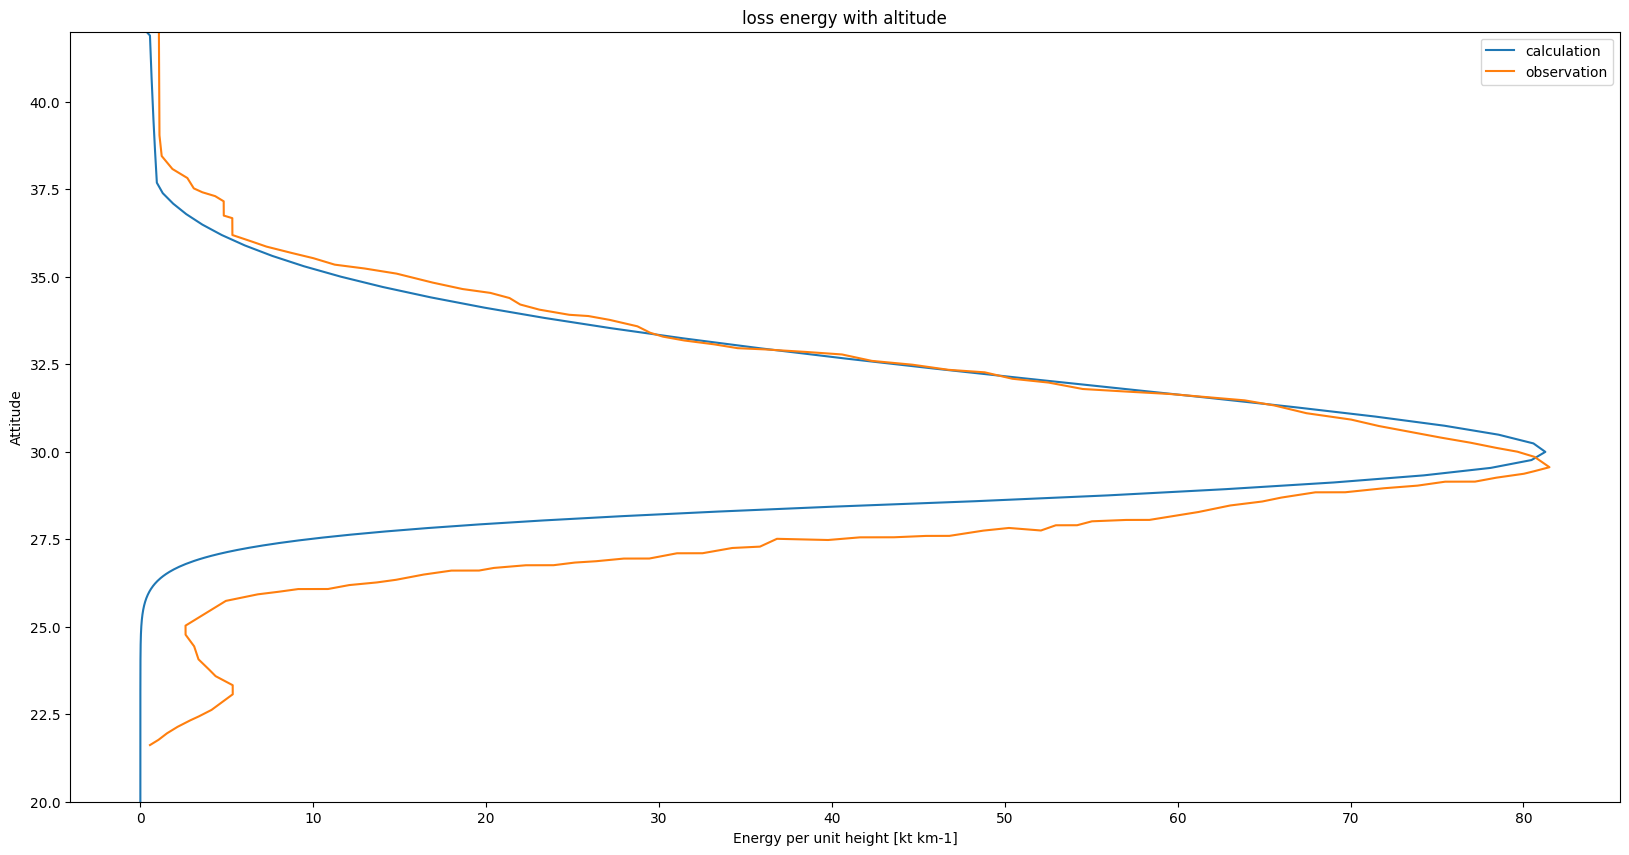

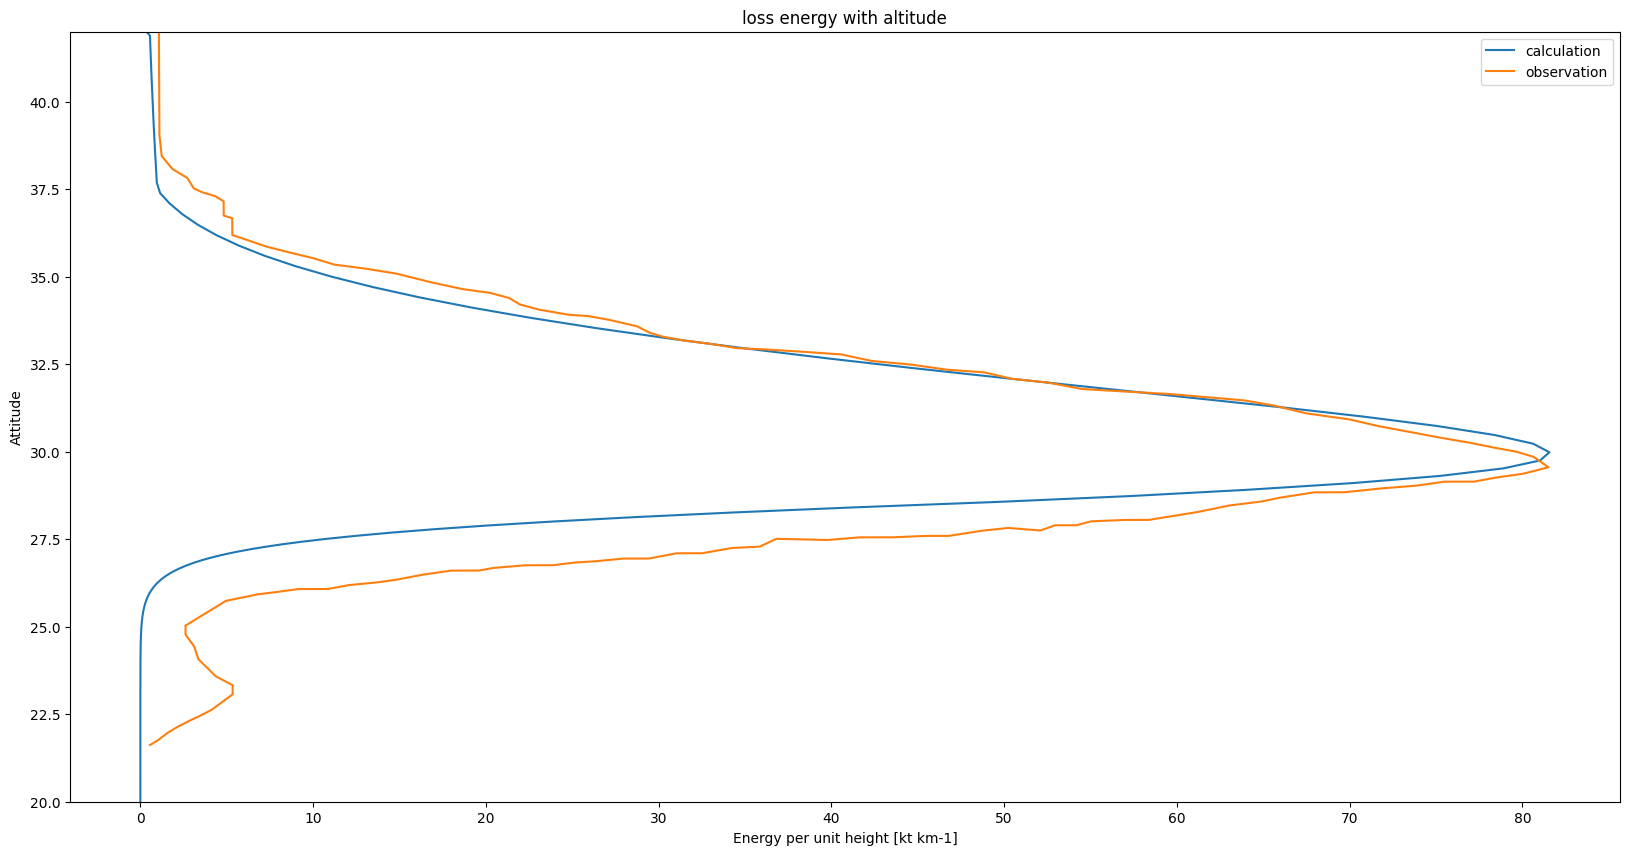

In [13]:
interation = 15
for i in range(interation):
    loc_b1 = np.argmax(loss_energy2)
    h_b1 = height[loc_b1]
    loc_b2 = np.argmax(loss_energy)
    h_b2 = x[loc_b2]
    h_diff = h_b1 - h_b2
    strength = strength - h_diff * 100000
    planet = solver.Planet(atmos_func='exponential')
    result = planet.solve_atmospheric_entry(radius=radius, angle=18.3,init_altitude=height[0] * 1000,
                                       strength=strength, density=3300,
                                       velocity=velocity)
    energy = planet.calculate_energy(result)
    fig, ax = plt.subplots(figsize=(20,10))
    loss_energy = energy['dedz']
    x = energy['altitude']/1000
    ax.plot(loss_energy,x, label = "calculation")
    ax.plot(loss_energy2,height, label = "observation")
    ax.set_xlabel('Energy per unit height [kt km-1]')
    ax.set_ylabel('Attitude')
    ax.set_title('loss energy with altitude')
    ax.legend()
    ax.set_ylim(20, 42)

In [14]:
planet = solver.Planet(atmos_func='exponential')
result = planet.solve_atmospheric_entry(radius=radius, angle=18.3,init_altitude=height[0] * 1000,
                                       strength=strength, density=3300,
                                       velocity=velocity)
energy = planet.calculate_energy(result)

(20.0, 42.0)

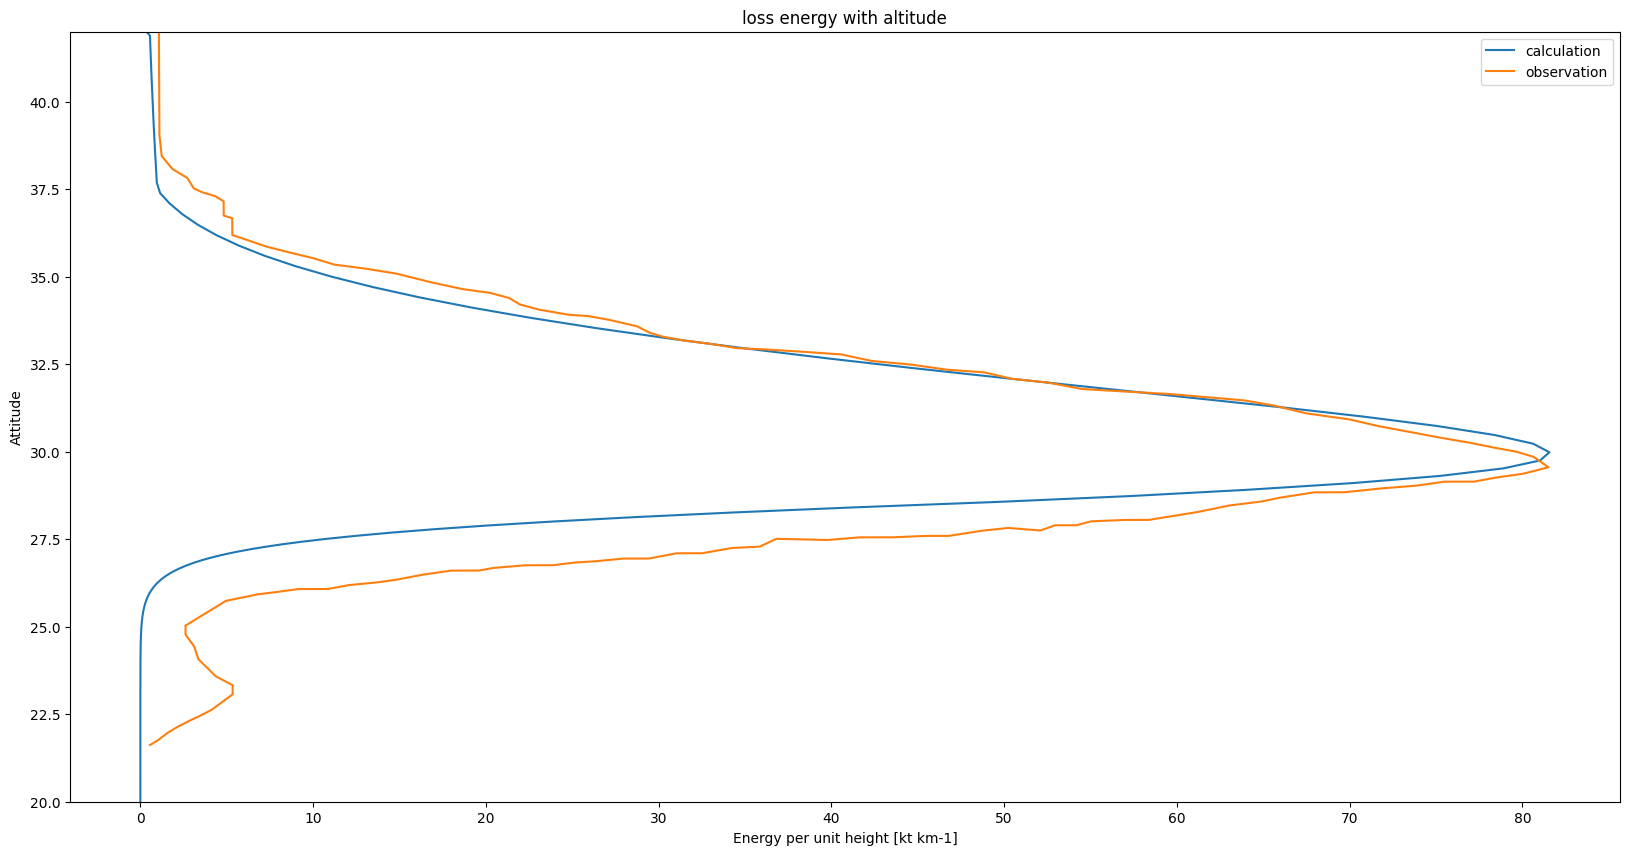

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
loss_energy = energy['dedz']
x = energy['altitude']/1000
ax.plot(loss_energy,x, label = "calculation")
ax.plot(loss_energy2,height, label = "observation")
ax.set_xlabel('Energy per unit height [kt km-1]')
ax.set_ylabel('Attitude')
ax.set_title('loss energy with altitude')
ax.legend()
ax.set_ylim(20, 42)

In [16]:
strength

3991608.019300191

In [17]:
loc_b1 = np.argmax(loss_energy2)
h_b1 = height[loc_b1]
interation = 10
loc_b2 = np.argmax(loss_energy)
h_b2 = x[loc_b2]
h_diff = h_b1 - h_b2
h_diff

-0.42655259813678725

In [18]:
final_para = pd.DataFrame([[radius,18.3,init_altitude,strength,3300,velocity]],
                    columns=['radius', 'angle', 'init_altitude',
                            'strngth', 'density', 'velocity'] )

### The funal parameter table is shown as follows.

In [19]:
final_para

,radius,angle,init_altitude,strngth,density,velocity
0,8.56124,18.3,42192.2,3.991608e+06,3300,19200
